# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset encompasses records from 100,000 medical appointments in Brazil, focusing on patient attendance. The primary aim is to discern influential factors determining patient attendance likelihood. Each patient's information is delineated by distinct identifiers:

1. **PatientId**: Unique patient identifier.
2. **AppointmentID**: Unique appointment identifier.
3. **Gender**: Denotes patient's gender (Male/Female).
4. **ScheduledDay**: Indicates appointment scheduling date.
5. **AppointmentDay**: Specifies appointment date.
6. **Age**: Patient's age in years.
7. **Neighbourhood**: Hospital location.
8. **Scholarship**: Binary indicator (1 for True, 0 for False) of government medical support.
9. **Hipertension**: Binary indicator (1 for True, 0 for False) of hypertension.
10. **Diabetes**: Binary indicator (1 for True, 0 for False) of diabetes.
11. **Alcoholism**: Binary indicator (1 for True, 0 for False) of alcoholism.
12. **Handcap**: Number of patient disabilities.
13. **SMS_received**: Binary indicator (1 for True, 0 for False) of SMS reminder receipt.
14. **No-show**: Binary indicator (Yes or No) of patient attendance (No for attendance, Yes for non-attendance).

This dataset facilitates exploration of factors influencing appointment attendance, crucial for predictive modeling and healthcare service enhancement.



### Questions for Analysis
1. Is there a relationship between the attendance and the gender?
2. Does the age of patients affect their attedance at appointments ?
3. How does a patient suffering from chronic diseases affect attendance at appointments?

In [151]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('ggplot')
from plotly.offline import iplot, plot

In [152]:
# Upgrade pandas to use dataframe.explode() function. 

!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling
 In this section, the data will be loaded, idetified by the columns data type, cleaned and prepared for the next step of the data analysis process.

### General Properties


In [153]:
# Loading Data
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df = pd.DataFrame(data)
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [154]:
#Investigating the size of the data (#rows,#columns)
df.shape


(110527, 14)

In [155]:
# Finding out statistical statements about the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can see that the minimum age is -1, which is not realistic and this situation need to be treated in the data cleaning subsiction.

In [156]:
#Finding null values
df.isnull().sum()



PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no null or missing values in all the columns.

In [ ]:
# Checking for any identical rows (duplication)
df.duplicated().sum()

There is no duplicated rows

In [83]:
#Exploring some basic facts about the data (ex.type..etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [84]:
# Checking for unique Patient ID 
df['PatientId'].nunique()

62299

In [85]:
#Checking for duplicated Patient ID 
df['PatientId'].duplicated().sum()

48228


### Data Cleaning

 

In [108]:
# Deleting unneeded columns that will not be used to analyze the data.
df.drop(['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood'], axis=1, inplace=True)
df.head()        

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


In [109]:
#Fixing the name of the columns in a proper way:
factors = {'No-show':'show','Hipertension':'Hypertension','Handcap':'Handicap'} 
df.rename(columns = factors , inplace = True)


In [110]:
#Converting the columns name to lowercase:
df.rename(columns = lambda x : x.lower(), inplace=True)
 

In [111]:
# change the show column values to boolean values
# 1=attended , 0= did not attend
df['show'] = df['show'].apply( lambda x: 1 if x == 'No' else 0)

In [112]:
#Check the data after fixing:
df.head(6)

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,F,62,0,1,0,0,0,0,1
1,M,56,0,0,0,0,0,0,1
2,F,62,0,0,0,0,0,0,1
3,F,8,0,0,0,0,0,0,1
4,F,56,0,1,1,0,0,0,1
5,F,76,0,1,0,0,0,0,1


Now we will find the non-realistic values of the age.

In [113]:
# Finding out negative values in age
x = df.query('age < 0')
x

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
99832,F,-1,0,0,0,0,0,0,1


We found that only one row has negative age value, and this row can be deleted from the dataset, since the data is large enough and this only row has no significant effect in the results to be investigated.

In [114]:
#Dropping the age with negative values:
df.drop(x.index, inplace=True)


In [115]:
#Checking the values after dropping:
x = df.query('age < 0')
x

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show


There is no negative values of age, so the row #99832 is eleminated.

In [116]:
#final check 
df.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,F,62,0,1,0,0,0,0,1
1,M,56,0,0,0,0,0,0,1
2,F,62,0,0,0,0,0,0,1
3,F,8,0,0,0,0,0,0,1
4,F,56,0,1,1,0,0,0,1


In [117]:
df.dtypes

gender          object
age              int64
scholarship      int64
hypertension     int64
diabetes         int64
alcoholism       int64
handicap         int64
sms_received     int64
show             int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

After we have trimmed and cleaned the data, we are ready to move on to exploration. In this section, we are going to compute statistics,create visulization, finding patterns in the data in order to address our research questions.


### General Properties

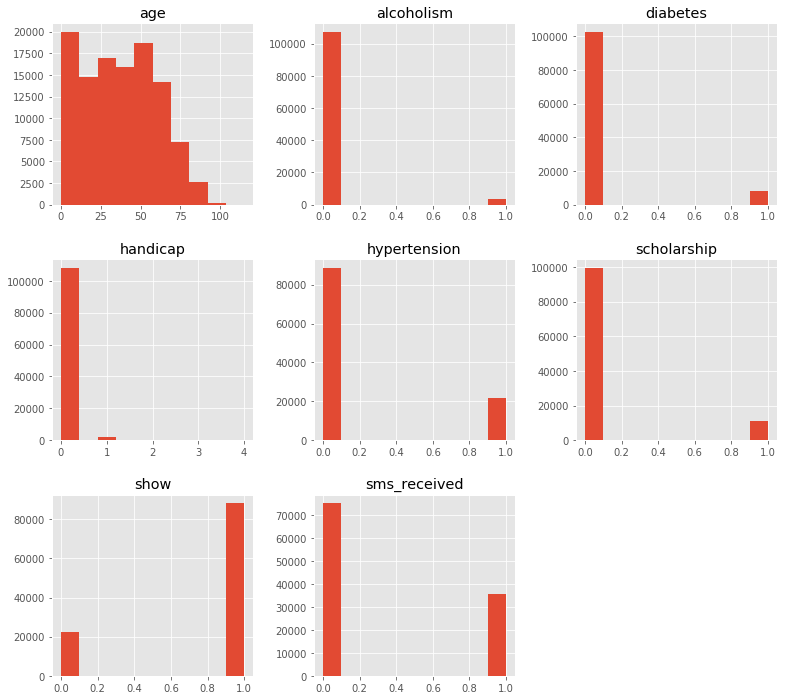

In [118]:
#Exploring dataset:

df.hist(figsize=(13,12));

From the above histogram charts we can find that:
1. Most of the patients do not suffer from chronic disease (diabetes, hypertention) or alcoholism.
2. Majority of the patients are not hadicap and do not have scholarship.
3. Most of them attended their appoitment.
4. approximately half of the patients have reseaved sms.
5. Most of them are less than 75 years old.


### Research Question 1 (Is there a relationship between the attendance and the gender?)

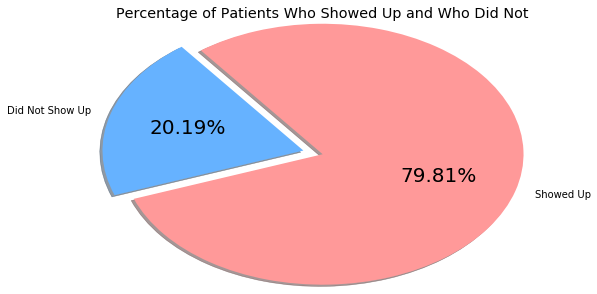

In [119]:
#pie chart explain the ratio of patients who showed up and who didn't

color = ['#FF9999', '#66B2FF']

label = ['Showed Up', 'Did Not Show Up']
count_data = df['show'].value_counts()
explode_offset = (0, 0.15)

plt.pie(count_data, radius=1.5, colors=color, labels=label, explode=explode_offset, autopct='%0.2f%%', shadow=True, startangle=200, textprops={"fontsize": 20})
plt.title("Percentage of Patients Who Showed Up and Who Did Not", y=1.1)
plt.show()


From the pie chart we can see that around 80% of the patients have showed up.

In [120]:
#create a data frame that contains patients who attend in their appointment and who did not:
show = df.query('show == 1')
no_show = df.query('show == 0')

# Count the number of rows where 'show' is True (1)
show_count = show.shape[0]

# Count the number of rows where 'show' is False (0)
no_show_count = no_show.shape[0]

print("Number of patients who showed up for the appointment:", show_count)
print("Number of patients who did not show up for the appointment:", no_show_count)


('Number of patients who showed up for the appointment:', 88207)
('Number of patients who did not show up for the appointment:', 22319)


In [121]:
# To calculate the ratio of showing up based on a certain criteria
def calc_ratio(df, column1, column2):

    ratio = df.groupby(column1)[column2].value_counts(normalize=True).unstack(column2)
    
    return ratio

In [122]:
#% of females and males who show up compared to their total in general using calc_ratio function
gender_ratio = calc_ratio(df,'gender',"show")
gender_ratio

show,0,1
gender,,
F,0.203149,0.796851
M,0.199679,0.800321


Now let's visualize these ratios

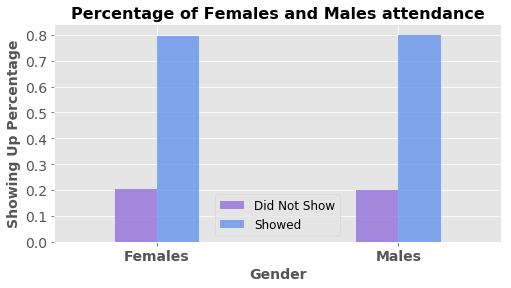

In [123]:
 #creating bar chart for females and males ratio 
import matplotlib.pyplot as plt
gender_ratio.plot(kind="bar",
                  width=0.35,
                  rot=0,
                  color=['MediumPurple', 'CornflowerBlue'],  # Modified colors
                  alpha=0.8,
                  fontsize=14,  # Modified font size
                  figsize=(8, 4))

plt.title("Percentage of Females and Males attendance", fontsize=16, weight='bold')  # Modified title font size and weight
plt.ylabel('Showing Up Percentage', fontsize=14, weight='bold')  # Modified font size and weight
plt.xlabel('Gender', fontsize=14, weight='bold')  # Modified font size and weight
locations = ['Females', 'Males']
plt.xticks(np.arange(len(locations)), locations, fontsize=14, weight='bold')  # Modified font size and weight
plt.legend(["Did Not Show", "Showed"], fontsize=12)  # Modified legend font size

plt.show()


From the bar chart we can conclude that there is no relationship between the gender and tha attendance, since the ratios are approximately equal.

### Research Question 2  (Does the age of patients affect their attedance to the appointment ?)

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64


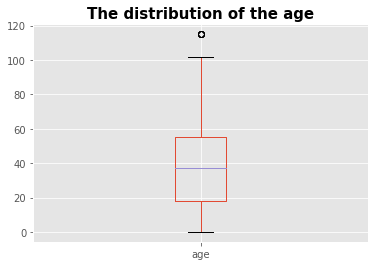

In [124]:
# plotting box plot for the age distribution 
df.boxplot(column=['age'])
plt.title('The distribution of the age',fontsize=15,weight='bold' );

# Calculating summary statistics
stats = df['age'].describe()

print(stats)

We can see that the minimum age is zero which relates to newborns and the average age of the patients is 37 years

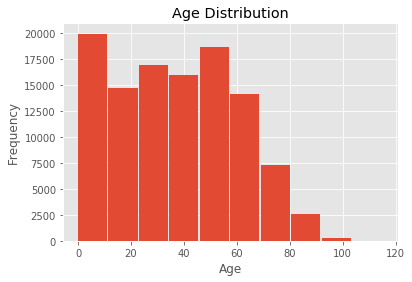

In [126]:
#plotting histogram chart for the age distribution
plt.hist(df['age'], width=11)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

From the histogram we can see that most of the patients are newborns and the number of patients who schedule appointment decreases as the age get older than 60 years.

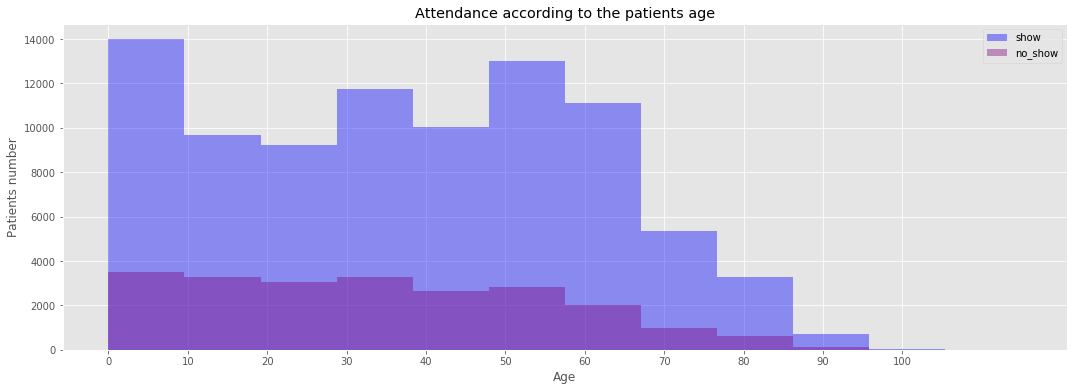

In [150]:
# creating a histogram that compares the attendance according to the age.

def attendance(col_name, show, no_show):
    plt.figure(figsize=[18,6])
    show[col_name].hist(alpha=0.4, bins=12, color="blue", label="show")
    no_show[col_name].hist(alpha=0.4, bins=12, color="purple", label="no_show")
    plt.legend()
    plt.title('Attendance according to the patients age')
    plt.xlabel('Age')
    plt.ylabel('Patients number')
    plt.xticks(range(0, 110, 10))  
    plt.show()
attendance('age', show, no_show)


From the hsitogram we can see that at each age, the number of patients who showed up is more than who missed their appoitment. Elderly people miss their appoitments while newborns and young kids attend their appoitments, we can say from the visulazitaion that people take care of their kids and prioritize their health, however, they should care about their elderly parents as well and ensure they attend their appointments.

### Research Question 3  (How does a patient suffering from chronic diseases affect attendance at appointments?)

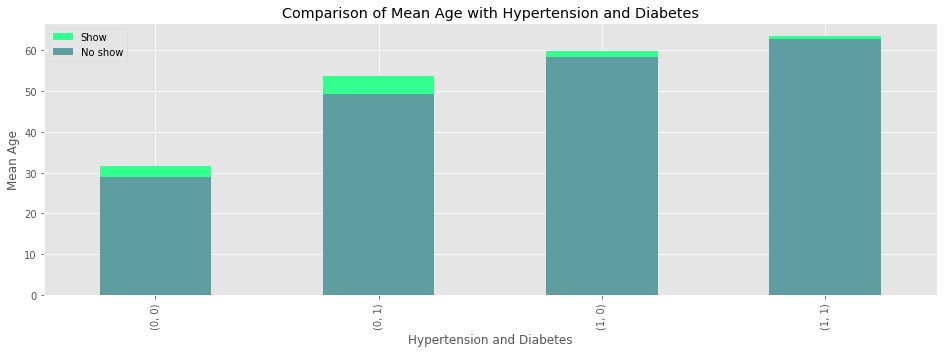

In [148]:


plt.figure(figsize=[16,5])

# Grouping by 'hypertension' and 'diabetes' & calculate mean age for patients who showed up
df[df['show'] == 1].groupby(['hypertension', 'diabetes']).mean()['age'].plot(kind='bar', color=['#33FF8E'], label="Show")

# Grouping by 'hypertension' and 'diabetes' & calculate mean age for patients who did not show up
df[df['show'] == 0].groupby(['hypertension', 'diabetes']).mean()['age'].plot(kind='bar', color=['CadetBlue'], label="No show")

plt.legend()
plt.title('Comparison of Mean Age with Hypertension and Diabetes')
plt.xlabel('Hypertension and Diabetes')
plt.ylabel('Mean Age')
plt.show()


In [149]:
df[df['show'] == 1].groupby(['hypertension', 'diabetes']).mean()['age'], df[df['show'] == 0].groupby(['hypertension', 'diabetes']).mean()['age']

(hypertension  diabetes
 0             0           31.510433
               1           53.666952
 1             0           59.702144
               1           63.406361
 Name: age, dtype: float64, hypertension  diabetes
 0             0           28.834155
               1           49.183391
 1             0           58.377043
               1           62.820333
 Name: age, dtype: float64)

We can see that people who suffer from Hypertension and Diabetes are older than 60 years and their likelihood to do not attend their appointment is higher. The mean age of patients who showed up and suffer from Hypertention only is about 55 years and who did not show is about 50 years. overall, the chronic disease has no significant factor on the patients attendance for their appointments.

<a id='conclusions'></a>
## Conclusions

1. The percentage of people who showed up is 79.81%. and the gender has no affect in the attendance since the ratio of male and female who showed up is approzimately the same.
2. Newborns (age=0) attend their appointments more than other ages.
3. There is no clear correlation between suffering from chronic diseases and the likelihood of attendance.

### Limitations
1. The majority of the variables are categorical, limiting the application of advanced statistical methods.
2. The age column has values of 0 which does not make sence, so I considered them as newborns or kids who are less than 1 year old.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0